In [8]:
import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import cmath
import random
from IPython import display

In [2]:
#Angles
A=numpy.array([])
B=numpy.array([])
C=numpy.array([])
D=numpy.array([])
for i in range (0,1000):
    Alpha12=random.uniform(0, 2*numpy.pi)
    Alpha13=random.uniform(0, 2*numpy.pi)
    Alpha14=random.uniform(0, 2*numpy.pi)
    Alpha15=random.uniform(0, 2*numpy.pi)
    A=numpy.append(A, Alpha12)
    B=numpy.append(B, Alpha13) 
    C=numpy.append(C, Alpha14)
    D=numpy.append(D, Alpha15)

In [3]:
#Normal hierarchy parameters (Best Fit)

T12=numpy.arcsin((0.307)**(1/2))
T13=numpy.arcsin((0.022)**(1/2))
T14=numpy.arcsin((0.017/0.98)**(1/2))
T15=numpy.arcsin((0.02)**(1/2))

maxT12=numpy.arcsin((0.346)**(1/2))
maxT13=numpy.arcsin((0.0241)**(1/2))
maxT14=numpy.arcsin((0.029/0.965)**(1/2))
maxT15=numpy.arcsin((0.035)**(1/2))

minT12=numpy.arcsin((0.268)**(1/2))
minT13=numpy.arcsin((0.0199)**(1/2))
minT14=numpy.arcsin((0.004/0.995)**(1/2))
minT15=numpy.arcsin((0.005)**(1/2))

NHs12=(numpy.sin(T12))**2
NHs13=(numpy.sin(T13))**2
NHc12=(numpy.cos(T12))**2
NHc13=(numpy.cos(T13))**2
NHs14=(numpy.sin(T14))**2
NHc14=(numpy.cos(T14))**2
NHs15=(numpy.sin(T15))**2
NHc15=(numpy.cos(T15))**2

#NHs14=0
#NHc14=1

solarmass=0.0000753
atmmass=0.0025283
LSNDmass=0.47
Newmass=0.87
#LSNDmass=0

#solarmass=del_m21^2
#atmmass=del_m31^2

#Normal hierarchy parameters (3 sigma)

maxNHs12=(numpy.sin(maxT12))**2
minNHs12=(numpy.sin(minT12))**2

maxNHs13=(numpy.sin(maxT13))**2
minNHs13=(numpy.sin(minT13))**2

maxNHc12=(numpy.cos(minT12))**2
minNHc12=(numpy.cos(maxT12))**2

maxNHc13=(numpy.cos(minT13))**2
minNHc13=(numpy.cos(maxT13))**2

maxNHs14=(numpy.sin(maxT14))**2
minNHs14=(numpy.sin(minT14))**2

maxNHc14=(numpy.cos(minT14))**2
minNHc14=(numpy.cos(maxT14))**2

maxNHs15=(numpy.sin(maxT15))**2
minNHs15=(numpy.sin(minT15))**2

maxNHc15=(numpy.cos(minT15))**2
minNHc15=(numpy.cos(maxT15))**2

maxsolarmass=0.0000807
minsolarmass=0.0000699

maxatmmass=0.0025631
minatmmass=0.0024935

maxLSNDmass=0.52
minLSNDmass=0.42

maxNewmass=0.97
minNewmass=0.77

NHm1=numpy.linspace(0.0001,0.001,2000) 
NHm1=numpy.append(NHm1, numpy.linspace(0.001,0.01,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.01,0.1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.1,1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(1,10,2000))

maxNHm2=(NHm1**2+maxsolarmass)**(1/2)
NHm2=(NHm1**2+solarmass)**(1/2)
minNHm2=(NHm1**2+minsolarmass)**(1/2)

maxNHm3=(NHm1**2+maxatmmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
minNHm3=(NHm1**2+minatmmass)**(1/2)

maxNHm4=(NHm1**2+maxLSNDmass)**(1/2)
NHm4=(NHm1**2+LSNDmass)**(1/2)
minNHm4=(NHm1**2+minLSNDmass)**(1/2)

maxNHm5=(NHm1**2-maxNewmass)**(1/2)
NHm5=(NHm1**2-Newmass)**(1/2)
minNHm5=(NHm1**2-minNewmass)**(1/2)

C:\Users\pacoh\AppData\Local\Temp/ipykernel_23072/3383776249.py:95: RuntimeWarning: invalid value encountered in sqrt
  maxNHm5=(NHm1**2-maxNewmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_23072/3383776249.py:96: RuntimeWarning: invalid value encountered in sqrt
  NHm5=(NHm1**2-Newmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_23072/3383776249.py:97: RuntimeWarning: invalid value encountered in sqrt
  minNHm5=(NHm1**2-minNewmass)**(1/2)


In [4]:
#Inverted hierarchy parameters (Best Fit)

IT12=numpy.arcsin((0.307)**(1/2))
IT13=numpy.arcsin((0.022)**(1/2))
IT14=numpy.arcsin((0.017/0.98)**(1/2))
IT15=numpy.arcsin((0.02)**(1/2))

maxIT12=numpy.arcsin((0.346)**(1/2))
maxIT13=numpy.arcsin((0.0241)**(1/2))
maxIT14=numpy.arcsin((0.029/0.965)**(1/2))
maxIT15=numpy.arcsin((0.035)**(1/2))

minIT12=numpy.arcsin((0.268)**(1/2))
minIT13=numpy.arcsin((0.0199)**(1/2))
minIT14=numpy.arcsin((0.004/0.995)**(1/2))
minIT15=numpy.arcsin((0.005)**(1/2))

IHs12=(numpy.sin(IT12))**2
IHs13=(numpy.sin(IT13))**2
IHc12=(numpy.cos(IT12))**2
IHc13=(numpy.cos(IT13))**2
IHs14=(numpy.sin(IT14))**2
IHc14=(numpy.cos(IT14))**2
IHs15=(numpy.sin(IT15))**2
IHc15=(numpy.cos(IT15))**2

#IHs14=0
#IHc14=1

Isolarmass=0.0000753
Iatmmass=0.0025283
ILSNDmass=0.47
INewmass=0.87
#LSNDmass=0

#solarmass=del_m21^2
#atmmass=del_m31^2

#Inverted hierarchy parameters (3 sigma)

maxIHs12=(numpy.sin(maxIT12))**2
minIHs12=(numpy.sin(minIT12))**2

maxIHs13=(numpy.sin(maxIT13))**2
minIHs13=(numpy.sin(minIT13))**2

maxIHc12=(numpy.cos(minIT12))**2
minIHc12=(numpy.cos(maxIT12))**2

maxIHc13=(numpy.cos(minIT13))**2
minIHc13=(numpy.cos(maxIT13))**2

maxIHs14=(numpy.sin(maxIT14))**2
minIHs14=(numpy.sin(minIT14))**2

maxIHc14=(numpy.cos(minIT14))**2
minIHc14=(numpy.cos(maxIT14))**2

maxIHs15=(numpy.sin(maxIT15))**2
minIHs15=(numpy.sin(minIT15))**2

maxIHc15=(numpy.cos(minIT15))**2
minIHc15=(numpy.cos(maxIT15))**2

maxIsolarmass=0.0000807
minIsolarmass=0.0000699

maxIatmmass=0.0025631
minIatmmass=0.0024935

maxILSNDmass=0.52
minILSNDmass=0.42

maxINewmass=0.97
minINewmass=0.77

IHm3=numpy.linspace(0.0001,0.001,2000) 
IHm3=numpy.append(IHm3, numpy.linspace(0.001,0.01,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.01,0.1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.1,1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(1,10,2000))

maxIHm1=(IHm3**2+maxIatmmass)**(1/2)
IHm1=(IHm3**2+Iatmmass)**(1/2)
minIHm1=(IHm3**2+minIatmmass)**(1/2)

maxIHm2=(IHm3**2+maxIatmmass+maxIsolarmass)**(1/2)
IHm2=(IHm3**2+Iatmmass+Isolarmass)**(1/2)
minIHm2=(IHm3**2+minIatmmass+minIsolarmass)**(1/2)

maxIHm4=(IHm3**2+maxILSNDmass+maxIatmmass)**(1/2)
IHm4=(IHm3**2+ILSNDmass+Iatmmass)**(1/2)
minIHm4=(IHm3**2+minILSNDmass+minIatmmass)**(1/2)

maxIHm5=(IHm3**2+maxIatmmass-maxINewmass)**(1/2)
IHm5=(IHm3**2+Iatmmass-INewmass)**(1/2)
minIHm5=(IHm3**2+minIatmmass-minINewmass)**(1/2)

C:\Users\pacoh\AppData\Local\Temp/ipykernel_23072/1193419478.py:95: RuntimeWarning: invalid value encountered in sqrt
  maxIHm5=(IHm3**2+maxIatmmass-maxINewmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_23072/1193419478.py:96: RuntimeWarning: invalid value encountered in sqrt
  IHm5=(IHm3**2+Iatmmass-INewmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_23072/1193419478.py:97: RuntimeWarning: invalid value encountered in sqrt
  minIHm5=(IHm3**2+minIatmmass-minINewmass)**(1/2)


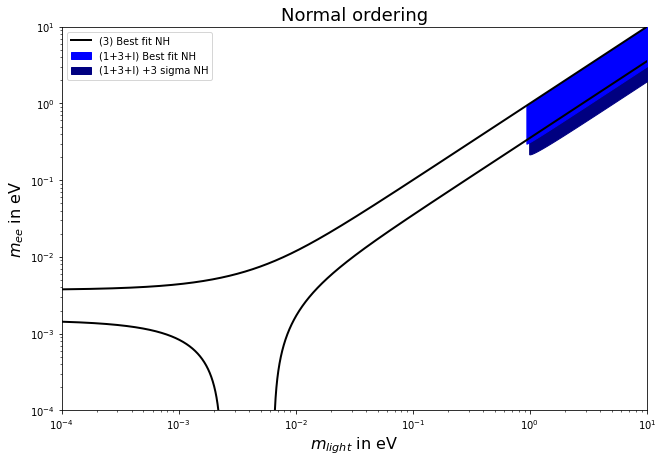

In [5]:
plt.figure(figsize=(9,6))

NHmee1=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 + NHs13*NHm3)                           
NHmee2=abs(NHc12*NHc13*NHm1 + NHs12*NHc13*NHm2 + NHs13*NHm3)
NHmee3=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 - NHs13*NHm3)

NHm1filt1=NHm1[NHm1<0.0024]
NHm1filt3=NHm1[NHm1>0.0065]
NHmee1filt1=NHmee1[NHm1<0.0024]
NHmee3filt3=NHmee3[NHm1>0.0065]

plt.plot(NHm1filt1,NHmee1filt1,color="black",label="(3) Best fit NH",linestyle="-",linewidth=2, alpha=1,zorder=18)
plt.plot(NHm1,NHmee2,color="black",linestyle="-",linewidth=2, alpha=1,zorder=18)
plt.plot(NHm1filt3,NHmee3filt3,color="black",linestyle="-",linewidth=2, alpha=1,zorder=18)

NHmee11=abs(NHc12*NHc13*NHc14*NHc15*NHm1 + 
              NHs12*NHc13*NHc14*NHc15*NHm2*cmath.exp(complex(0,0)) +
              NHs13*NHc14*NHc15*NHm3*cmath.exp(complex(0,0)) +
              NHs14*NHc15*NHm4*cmath.exp(complex(0,0)) + 
              NHs15*NHm5*cmath.exp(complex(0,0)))

NHmee12=abs(NHc12*NHc13*NHc14*NHc15*NHm1 + 
              NHs12*NHc13*NHc14*NHc15*NHm2*cmath.exp(complex(0,numpy.pi)) +
              NHs13*NHc14*NHc15*NHm3*cmath.exp(complex(0,numpy.pi)) +
              NHs14*NHc15*NHm4*cmath.exp(complex(0,numpy.pi)) + 
              NHs15*NHm5*cmath.exp(complex(0,numpy.pi)))


maxNHmee11=abs(minNHc12*minNHc13*minNHc14*minNHc15*NHm1 + 
              maxNHs12*minNHc13*minNHc14*minNHc15*maxNHm2*cmath.exp(complex(0,0)) +
              maxNHs13*minNHc14*minNHc15*maxNHm3*cmath.exp(complex(0,0)) +
              maxNHs14*minNHc15*maxNHm4*cmath.exp(complex(0,0)) + 
              maxNHs15*maxNHm5*cmath.exp(complex(0,0)))

maxNHmee12=abs(minNHc12*minNHc13*minNHc14*minNHc15*NHm1 + 
              maxNHs12*minNHc13*minNHc14*minNHc15*maxNHm2*cmath.exp(complex(0,numpy.pi)) +
              maxNHs13*minNHc14*minNHc15*maxNHm3*cmath.exp(complex(0,numpy.pi)) +
              maxNHs14*minNHc15*maxNHm4*cmath.exp(complex(0,numpy.pi)) + 
              maxNHs15*maxNHm5*cmath.exp(complex(0,numpy.pi)))
               

minNHmee11=abs(maxNHc12*maxNHc13*maxNHc14*maxNHc15*NHm1 + 
              minNHs12*maxNHc13*maxNHc14*maxNHc15*minNHm2*cmath.exp(complex(0,0)) +
              minNHs13*maxNHc14*maxNHc15*minNHm3*cmath.exp(complex(0,0)) +
              minNHs14*maxNHc15*minNHm4*cmath.exp(complex(0,0)) + 
              minNHs15*minNHm5*cmath.exp(complex(0,0)))

minNHmee12=abs(maxNHc12*maxNHc13*maxNHc14*maxNHc15*NHm1 + 
              minNHs12*maxNHc13*maxNHc14*maxNHc15*minNHm2*cmath.exp(complex(0,numpy.pi)) +
              minNHs13*maxNHc14*maxNHc15*minNHm3*cmath.exp(complex(0,numpy.pi)) +
              minNHs14*maxNHc15*minNHm4*cmath.exp(complex(0,numpy.pi)) + 
              minNHs15*minNHm5*cmath.exp(complex(0,numpy.pi)))


#plt.plot(NHm1,NHmee11,color="red",linestyle="-",linewidth=2, alpha=1,zorder=16)
#plt.plot(NHm1,NHmee12,color="gray",linestyle="-",linewidth=2, alpha=1,zorder=16)

#plt.plot(NHm1,maxNHmee11,color="red",linestyle="--",linewidth=2, alpha=1,zorder=16)
#plt.plot(NHm1,maxNHmee12,color="gray",linestyle="--",linewidth=2, alpha=1,zorder=16)

#plt.plot(NHm1,minNHmee11,color="red",linestyle="-.",linewidth=2, alpha=1,zorder=16)
#plt.plot(NHm1,minNHmee12,color="gray",linestyle="-.",linewidth=2, alpha=1,zorder=16)

plt.fill_between(NHm1, NHmee11, NHmee12, color="blue",label="(1+3+I) Best fit NH",alpha=1,zorder=14)

plt.fill_between(NHm1, maxNHmee11, maxNHmee12, color="navy",label="(1+3+I) +3 sigma NH",alpha=1,zorder=13)
               
plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.title("Normal ordering", fontsize=18)
plt.xlabel("$m_{light}$ in eV",fontsize=16)
plt.ylabel("$m_{ee}$ in eV",fontsize=16)
plt.legend(fontsize=10,loc=2)
plt.show()

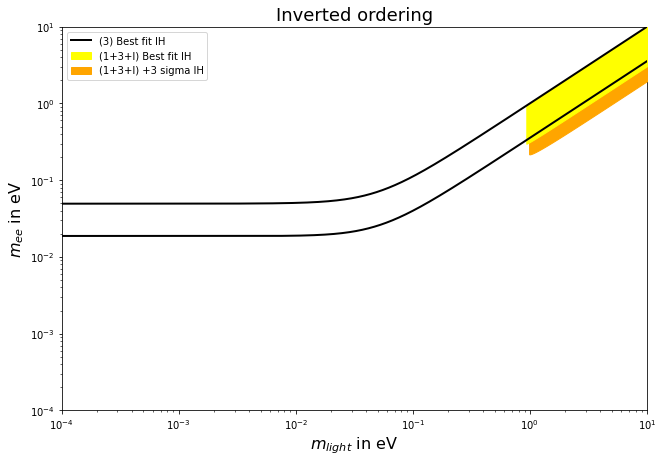

In [6]:
plt.figure(figsize=(9,6))

IHmee1=abs(IHc12*IHc13*IHm1 + IHs12*IHc13*IHm2 + IHs13*IHm3)
IHmee2=abs(IHc12*IHc13*IHm1 - IHs12*IHc13*IHm2 - IHs13*IHm3)

plt.plot(IHm3,IHmee1,color="black",label="(3) Best fit IH",linestyle="-",linewidth=2, alpha=1,zorder=16)
plt.plot(IHm3,IHmee2,color="black",linestyle="-",linewidth=2, alpha=1,zorder=16)

IHmee11=abs(IHc12*IHc13*IHc14*IHc15*IHm1 + 
              IHs12*IHc13*IHc14*IHc15*IHm2*cmath.exp(complex(0,0)) +
              IHs13*IHc14*IHc15*IHm3*cmath.exp(complex(0,0)) +
              IHs14*IHc15*IHm4*cmath.exp(complex(0,0)) + 
              IHs15*IHm5*cmath.exp(complex(0,0)))

IHmee12=abs(IHc12*IHc13*IHc14*IHc15*IHm1 + 
              IHs12*IHc13*IHc14*IHc15*IHm2*cmath.exp(complex(0,numpy.pi)) +
              IHs13*IHc14*IHc15*IHm3*cmath.exp(complex(0,numpy.pi)) +
              IHs14*IHc15*IHm4*cmath.exp(complex(0,numpy.pi)) + 
              IHs15*IHm5*cmath.exp(complex(0,numpy.pi)))


maxIHmee11=abs(minIHc12*minIHc13*minIHc14*minIHc15*maxIHm1 + 
              maxIHs12*minIHc13*minIHc14*minIHc15*maxIHm2*cmath.exp(complex(0,0)) +
              maxIHs13*minIHc14*minIHc15*IHm3*cmath.exp(complex(0,0)) +
              maxIHs14*minIHc15*maxIHm4*cmath.exp(complex(0,0)) + 
              maxIHs15*maxIHm5*cmath.exp(complex(0,0)))

maxIHmee12=abs(minIHc12*minIHc13*minIHc14*minIHc15*maxIHm1 + 
              maxIHs12*minIHc13*minIHc14*minIHc15*maxIHm2*cmath.exp(complex(0,numpy.pi)) +
              maxIHs13*minIHc14*minIHc15*IHm3*cmath.exp(complex(0,numpy.pi)) +
              maxIHs14*minIHc15*maxIHm4*cmath.exp(complex(0,numpy.pi)) + 
              maxIHs15*maxIHm5*cmath.exp(complex(0,numpy.pi)))
               

minIHmee11=abs(maxIHc12*maxIHc13*maxIHc14*maxIHc15*minIHm1 + 
              minIHs12*maxIHc13*maxIHc14*maxIHc15*minIHm2*cmath.exp(complex(0,0)) +
              minIHs13*maxIHc14*maxIHc15*IHm3*cmath.exp(complex(0,0)) +
              minIHs14*maxIHc15*minIHm4*cmath.exp(complex(0,0)) + 
              minIHs15*minIHm5*cmath.exp(complex(0,0)))

minIHmee12=abs(maxIHc12*maxIHc13*maxIHc14*maxIHc15*minIHm1 + 
              minIHs12*maxIHc13*maxIHc14*maxIHc15*minIHm2*cmath.exp(complex(0,numpy.pi)) +
              minIHs13*maxIHc14*maxIHc15*IHm3*cmath.exp(complex(0,numpy.pi)) +
              minIHs14*maxIHc15*minIHm4*cmath.exp(complex(0,numpy.pi)) + 
              minIHs15*minIHm5*cmath.exp(complex(0,numpy.pi)))


#plt.plot(IHm3,IHmee11,color="red",linestyle="-",linewidth=2, alpha=1,zorder=16)
#plt.plot(IHm3,IHmee12,color="gray",linestyle="-",linewidth=2, alpha=1,zorder=16)

#plt.plot(IHm3,maxIHmee11,color="red",linestyle="--",linewidth=2, alpha=1,zorder=16)
#plt.plot(IHm3,maxIHmee12,color="gray",linestyle="--",linewidth=2, alpha=1,zorder=16)

#plt.plot(IHm3,minIHmee11,color="red",linestyle="-.",linewidth=2, alpha=1,zorder=16)
#plt.plot(IHm3,minIHmee12,color="gray",linestyle="-.",linewidth=2, alpha=1,zorder=16)

plt.fill_between(IHm3, IHmee11, IHmee12, color="yellow",label="(1+3+I) Best fit IH",alpha=1,zorder=14)

plt.fill_between(IHm3, maxIHmee11, maxIHmee12, color="orange",label="(1+3+I) +3 sigma IH",alpha=1,zorder=13)
               
plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.title("Inverted ordering", fontsize=18)
plt.xlabel("$m_{light}$ in eV",fontsize=16)
plt.ylabel("$m_{ee}$ in eV",fontsize=16)
plt.legend(fontsize=10,loc=2)
plt.show()

<IPython.core.display.Javascript object>


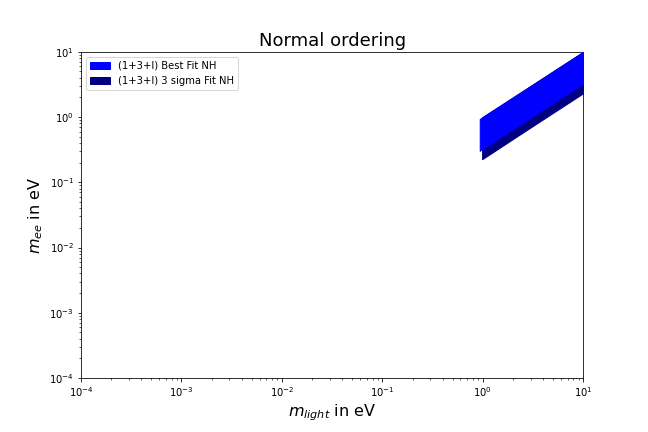

In [14]:
fig=plt.figure(figsize=(9,6))

def animate(frame): 
    
    NHs15=0.02*((frame)/100)
    NHc15=1-NHs15
    
    maxNHs15=0.035*((frame)/100)
    maxNHc15=1-maxNHs15
    
    minNHs15=0.005*((frame)/100) 
    minNHc15=1-minNHs15
    
    NHmee11=abs(NHc12*NHc13*NHc14*NHc15*NHm1 + 
              NHs12*NHc13*NHc14*NHc15*NHm2*cmath.exp(complex(0,0)) +
              NHs13*NHc14*NHc15*NHm3*cmath.exp(complex(0,0)) +
              NHs14*NHc15*NHm4*cmath.exp(complex(0,0)) + 
              NHs15*NHm5*cmath.exp(complex(0,0)))

    NHmee12=abs(NHc12*NHc13*NHc14*NHc15*NHm1 + 
              NHs12*NHc13*NHc14*NHc15*NHm2*cmath.exp(complex(0,numpy.pi)) +
              NHs13*NHc14*NHc15*NHm3*cmath.exp(complex(0,numpy.pi)) +
              NHs14*NHc15*NHm4*cmath.exp(complex(0,numpy.pi)) + 
              NHs15*NHm5*cmath.exp(complex(0,numpy.pi)))


    maxNHmee11=abs(minNHc12*minNHc13*minNHc14*minNHc15*NHm1 + 
              maxNHs12*minNHc13*minNHc14*minNHc15*maxNHm2*cmath.exp(complex(0,0)) +
              maxNHs13*minNHc14*minNHc15*maxNHm3*cmath.exp(complex(0,0)) +
              maxNHs14*minNHc15*maxNHm4*cmath.exp(complex(0,0)) + 
              maxNHs15*maxNHm5*cmath.exp(complex(0,0)))

    maxNHmee12=abs(minNHc12*minNHc13*minNHc14*minNHc15*NHm1 + 
              maxNHs12*minNHc13*minNHc14*minNHc15*maxNHm2*cmath.exp(complex(0,numpy.pi)) +
              maxNHs13*minNHc14*minNHc15*maxNHm3*cmath.exp(complex(0,numpy.pi)) +
              maxNHs14*minNHc15*maxNHm4*cmath.exp(complex(0,numpy.pi)) + 
              maxNHs15*maxNHm5*cmath.exp(complex(0,numpy.pi)))
    
    plt.cla()
    
    #pylab.plot(NHm1,NHmee11,color="black",label= "(1+3+I) Best fit NH",linestyle="--",linewidth=1, alpha=1,zorder=20)
    #pylab.plot(NHm1,NHmee12,color="blue",linestyle="--",linewidth=1, alpha=1,zorder=20)
    
    #pylab.plot(NHm1,maxNHmee11,color="black",label= "(1+3+I) 3 sigma fit NH",linestyle="-",linewidth=1, alpha=1,zorder=20)
    #pylab.plot(NHm1,maxNHmee12,color="blue",linestyle="-",linewidth=1, alpha=1,zorder=20)
    
    plt.fill_between(NHm1, NHmee11, NHmee12, color="blue",label="(1+3+I) Best Fit NH",alpha=1,zorder=14)
    plt.fill_between(NHm1, maxNHmee11, maxNHmee12, color="navy",label="(1+3+I) 3 sigma Fit NH", alpha=1,zorder=13)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Normal ordering", fontsize=18)
    pylab.xlabel("$m_{light}$ in eV",fontsize=16)
    pylab.ylabel("$m_{ee}$ in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)
    
anim = FuncAnimation(fig, animate, frames=100, interval=100)

<IPython.core.display.Javascript object>


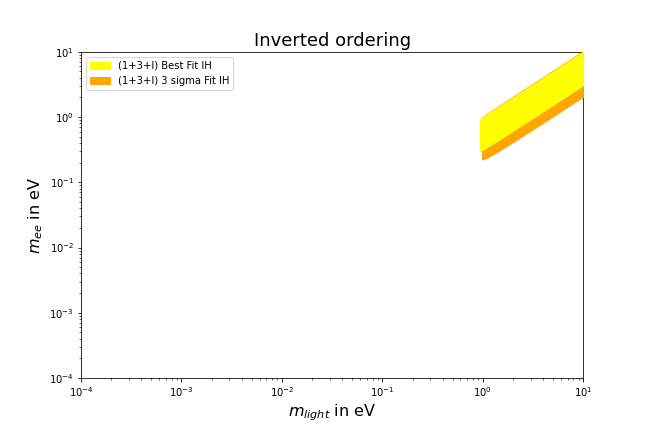

In [16]:
fig=plt.figure(figsize=(9,6))

def animate(frame):
    
    IHs15=0.02*((frame)/100)
    IHc15=1-IHs15
    
    maxIHs15=0.035*((frame)/100)
    maxIHc15=1-maxIHs15
    
    minIHs15=0.005*((frame)/100) 
    minIHc15=1-minIHs15
    
    IHmee11=abs(IHc12*IHc13*IHc14*IHc15*IHm1 + 
              IHs12*IHc13*IHc14*IHc15*IHm2*cmath.exp(complex(0,0)) +
              IHs13*IHc14*IHc15*IHm3*cmath.exp(complex(0,0)) +
              IHs14*IHc15*IHm4*cmath.exp(complex(0,0)) + 
              IHs15*IHm5*cmath.exp(complex(0,0)))

    IHmee12=abs(IHc12*IHc13*IHc14*IHc15*IHm1 + 
              IHs12*IHc13*IHc14*IHc15*IHm2*cmath.exp(complex(0,numpy.pi)) +
              IHs13*IHc14*IHc15*IHm3*cmath.exp(complex(0,numpy.pi)) +
              IHs14*IHc15*IHm4*cmath.exp(complex(0,numpy.pi)) + 
              IHs15*IHm5*cmath.exp(complex(0,numpy.pi)))


    maxIHmee11=abs(minIHc12*minIHc13*minIHc14*minIHc15*maxIHm1 + 
              maxIHs12*minIHc13*minIHc14*minIHc15*maxIHm2*cmath.exp(complex(0,0)) +
              maxIHs13*minIHc14*minIHc15*IHm3*cmath.exp(complex(0,0)) +
              maxIHs14*minIHc15*maxIHm4*cmath.exp(complex(0,0)) + 
              maxIHs15*maxIHm5*cmath.exp(complex(0,0)))

    maxIHmee12=abs(minIHc12*minIHc13*minIHc14*minIHc15*maxIHm1 + 
              maxIHs12*minIHc13*minIHc14*minIHc15*maxIHm2*cmath.exp(complex(0,numpy.pi)) +
              maxIHs13*minIHc14*minIHc15*IHm3*cmath.exp(complex(0,numpy.pi)) +
              maxIHs14*minIHc15*maxIHm4*cmath.exp(complex(0,numpy.pi)) + 
              maxIHs15*maxIHm5*cmath.exp(complex(0,numpy.pi)))
    
    plt.cla()
    
    #pylab.plot(IHm3,IHmee11,color="black",label= "(1+3+I) Best fit IH",linestyle="--",linewidth=1, alpha=1,zorder=20)
    #pylab.plot(IHm3,IHmee12,color="blue",linestyle="--",linewidth=1, alpha=1,zorder=20)
    
    #pylab.plot(IHm3,maxIHmee11,color="black",label= "(1+3+I) 3 sigma fit IH",linestyle="-",linewidth=1, alpha=1,zorder=20)
    #pylab.plot(IHm3,maxIHmee12,color="blue",linestyle="-",linewidth=1, alpha=1,zorder=20)
    
    plt.fill_between(IHm3, IHmee11, IHmee12, color="yellow",label="(1+3+I) Best Fit IH",alpha=1,zorder=14)
    plt.fill_between(IHm3, maxIHmee11, maxIHmee12, color="orange",label="(1+3+I) 3 sigma Fit IH", alpha=1,zorder=13)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Inverted ordering", fontsize=18)
    pylab.xlabel("$m_{light}$ in eV",fontsize=16)
    pylab.ylabel("$m_{ee}$ in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)
    
anim2 = FuncAnimation(fig, animate, frames=100, interval=100)

In [15]:
anim.save("SNS [m4] sterile Neutrino animation NH.gif", matplotlib.animation.PillowWriter(fps=30))

In [17]:
anim2.save("SIS [m4] sterile Neutrino animation IH.gif", matplotlib.animation.PillowWriter(fps=30))